In [3]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv('/Users/walkerrowe/Documents/mlbook/diabetes.csv', delimiter=',')


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
x = data.drop("Outcome", axis=1)

In [6]:
y=np.ravel(data['Outcome'])

In [13]:

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.5, random_state=50)


In [14]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_train)

x_train = scaler.transform(x_train)

x_test = scaler.transform(x_test)


/Users/walkerrowe/py34/lib/python3.4/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/walkerrowe/py34/lib/python3.4/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/Users/walkerrowe/py34/lib/python3.4/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [15]:

from sklearn.svm import SVC
svc_model = SVC()


In [16]:
svc_model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [17]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [18]:
y_predict = svc_model.predict(x_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

cm = np.array(confusion_matrix(y_test, y_predict, labels=[0,1]))

confusion = pd.DataFrame(cm, index=['Diabetic', 'Not Diabetic'], columns=['Predicted Diabetes', 'Predicted Healthy'])


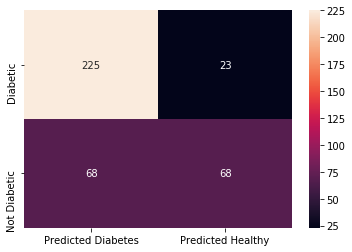

In [20]:
sns.heatmap(confusion,annot=True,fmt='g')

In [21]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       248
           1       0.75      0.50      0.60       136

   micro avg       0.76      0.76      0.76       384
   macro avg       0.76      0.70      0.72       384
weighted avg       0.76      0.76      0.75       384

